In [10]:
# Importamos nuestra librerías básicas
import numpy as np
import os
import itertools

from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import graphviz

# Este paso es para que los resultados en vuestros notebooks sean iguales a lo de este
np.random.seed(42)


# Aprendizaje supervisado - Decision Trees
El algoritmo de Decision Trees se basa en crear un árbol que va separando las instancias por un umbral en las características de forma a poder inferir en sus hojas a que clase corresponde cada instancia. El sklearn en su guia tiene como visualizar un árbol que incuye el dataset iris

In [7]:
# Cargamos el dataset
iris = load_iris()
# Creamos el modelo
clf = DecisionTreeClassifier()
# Entrenamos el modelo
clf = clf.fit(iris.data, iris.target)

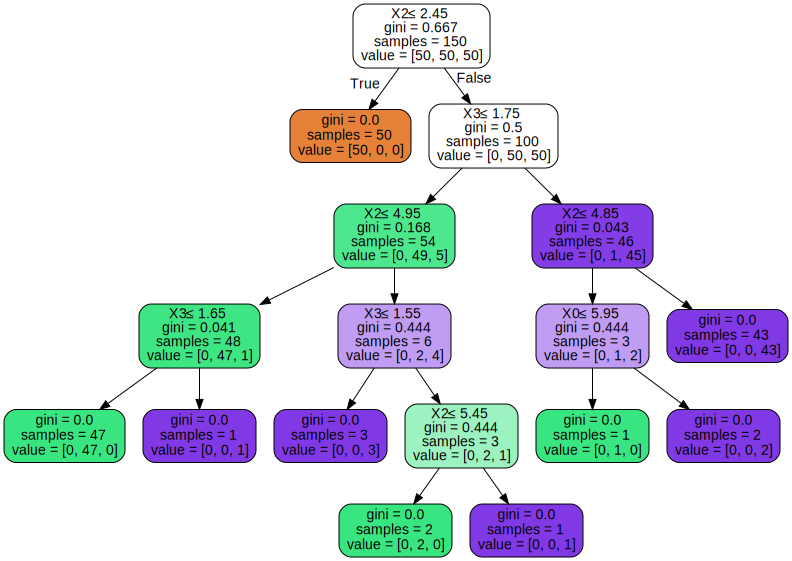

In [13]:
# Utilizaremos la librería graphviz para visualizar el árbol
export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Ahora vamos a clasificar el MNIST

In [2]:
# Aqui importamos los datos que vamos a clasificar

# Scikit-Learn ya incluye algunos datasets de ejemplo como el MNIST
mnist = fetch_mldata('MNIST original')

# Aqui cargamos nuestros ejemplos en X, el target en y. Nuestro objetivo con
# Machine Learning es aprender la función f(X) que genera y.
X, y = mnist["data"], mnist["target"]

In [3]:
# Nuestro objetivo es que la función aprendida funcione no solamente con
# el dataset de prueba, pero que también "generalize" bien para ejemplos
# que no haya visto antes.

# En esta sección separamos el dataset en 2 partes: el training set y test set
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Clasificador Decision Tree

In [4]:

# Creamos el modelo
tree_clf = DecisionTreeClassifier(random_state=42)

# Hacemos fit del modelo al dato
%time tree_clf.fit(X_train_o, y_train)


Wall time: 19.8 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [5]:
# Medimos el rendimiento. Como este metodo, realmente procesa cada instancia de prueba
# contra todas las instancias conocidas, medir el rendimiento tarda más.
# Esto también significa que las predicciones de este metodo tardan más que los clasificadores
# basados en modelos.
%time train_score = tree_clf.score(X_train_o, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time cv_score = cross_val_score(tree_clf, X_train_o, y_train, cv=5)
print("Rendimiento en la cross-validación: %.4f" % np.mean(cv_score))
%time score = tree_clf.score(X_test_o, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 159 ms
Rendimiento en el dataset de training: 1.0000
Wall time: 1min 17s
Rendimiento en la cross-validación: 0.8668
Wall time: 31.3 ms
Rendimiento en el dataset de pruebas: 0.8757


In [10]:
# Esta función esta adaptada de la documentación del Scikit-Learn para presentar
# la matrix de "confusión" de forma más visual
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
        

    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()

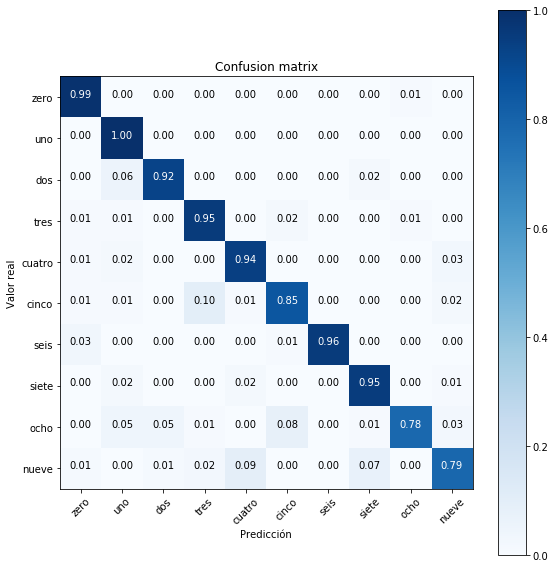

In [11]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, knn_clf.predict(X_test_o))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);

# Como tratar *overfitting* y *underfitting*